In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

In [150]:
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Stats: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Null Hypothesis has been rejected, Data has no unit and is stationary")
    else:
        print("We Fail to reject Null Hypothesis, Data is not stationary")

In [151]:
data = pd.read_csv("./yahoo_stock.csv")
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [153]:
data['Date'] = pd.to_datetime(data['Date'])

In [154]:
data.set_index(data['Date'], inplace=True)

In [155]:
ts = data['Open']

<Axes: xlabel='Date'>

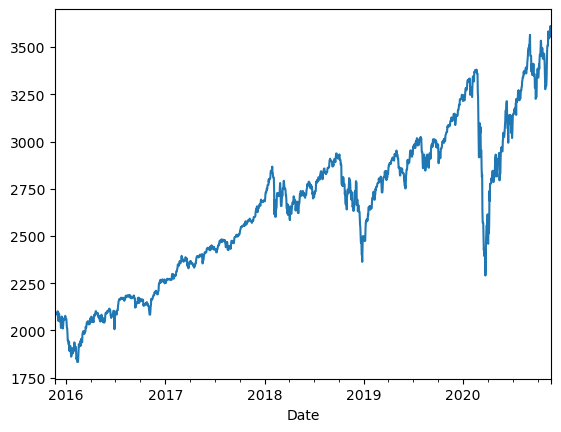

In [156]:
ts.plot()

In [157]:
decomposition = sm.tsa.seasonal_decompose(ts)
decomposition

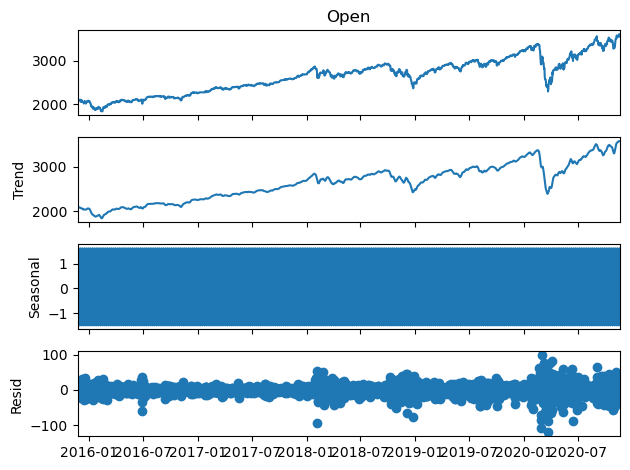

In [158]:
fig = decomposition.plot()
plt.show()

In [159]:
adfuller_test = adfuller(ts)
adf_test(ts)

ADF Stats: -0.8538645577833645
p-value: 0.8027857617750209
We Fail to reject Null Hypothesis, Data is not stationary


In [160]:
ts1 = ts.diff().dropna()
adf_test(ts1)

ADF Stats: -10.293202245859984
p-value: 3.525824831268522e-18
Null Hypothesis has been rejected, Data has no unit and is stationary


<Axes: xlabel='Date'>

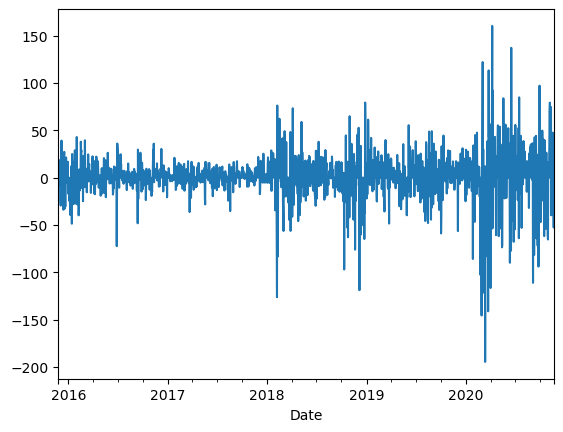

In [161]:
ts1.plot()

In [162]:
len(ts1)

1824

In [163]:
(1824/100)*20

364.79999999999995

In [164]:
len(ts1) - 364

1460

In [165]:
train_len = int(len(ts1) * .8)
train_len

1459

In [166]:
train = ts1[:train_len]

In [167]:
test = ts1[train_len:]

In [168]:
len(train), len(test)

(1459, 365)

In [169]:
model = ARIMA(train, order=(7, 0, 1)).fit()

In [170]:
len(train), len(ts1) - 1

(1459, 1823)

In [178]:
predictions = model.predict(start = len(train), end = len(ts1) - 1)

In [179]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predictions,test))

38.65152705404404

In [180]:
test.mean(), np.sqrt(test.var())

(1.289917995505137, 38.69957761008013)

<Axes: xlabel='Date'>

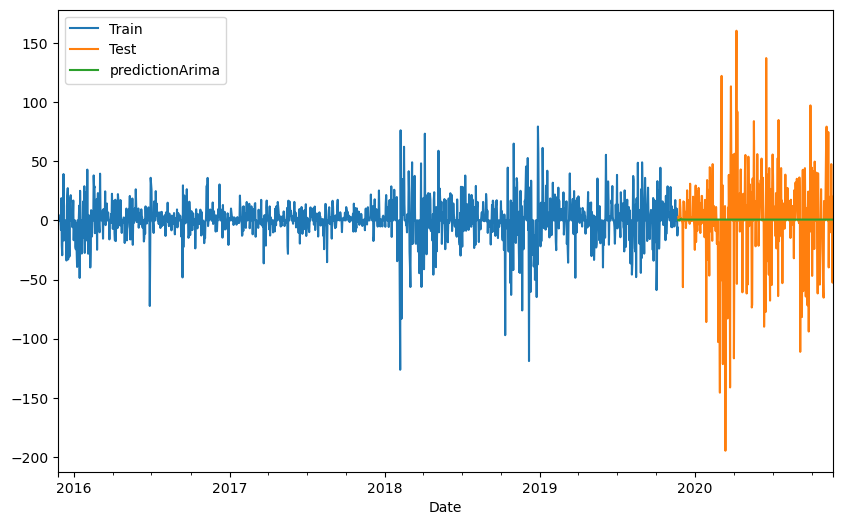

In [181]:
train.plot(legend=True, label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
predictions.plot(legend=True,label='predictionArima')

In [182]:
len(data)+20

1845

<Axes: xlabel='Date'>

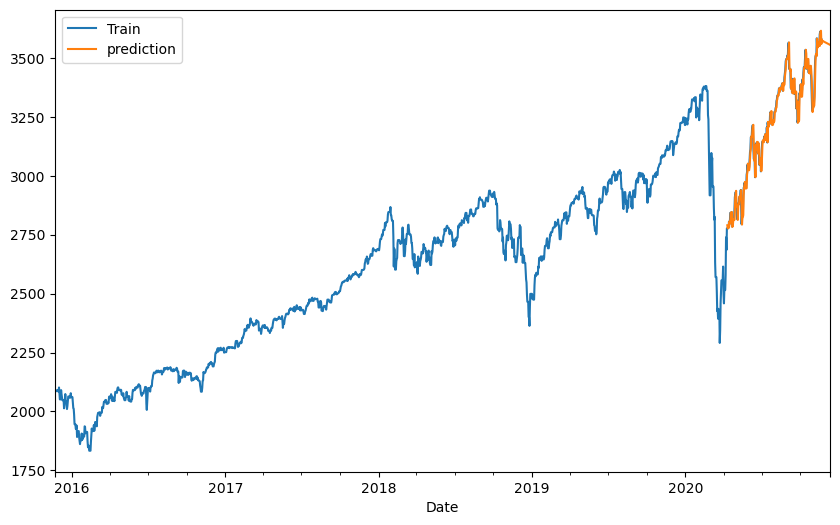

In [191]:
finalmodel = ARIMA(ts,order=(6, 0, 0)).fit()
prediction=finalmodel.predict(1600,len(data)+20)
ts.plot(legend=True,label='Train',figsize=(10,6))
prediction.plot(legend=True, label='prediction')

In [184]:
import itertools

In [185]:
p=range(0,8)
d=range(0,8)
q= range(0,2)
pdq_combinations  = list(itertools.product(p,d,q))

In [186]:
rmse, order1 = [], []

In [187]:
for pdq in pdq_combinations:    
    model=ARIMA(train,order=pdq).fit()
    pred = model.predict(start = len(train), end = len(ts1) - 1)
    error = np.sqrt(mean_squared_error(test,pred))
    print(error)
    order1.append(pdq)
    rmse.append(error)

38.65105358180828
38.651050705983984
39.35992057140795
38.65082606417618
1391.147467328179
39.45880768635803
869687.7070992609
1331.5335826390408
158810599.8942984
965122.0018497569
15889634441.846098
168186321.6414331
916209152034.9005
16554397569.891699
30729262365946.09
947734218967.0496
38.65105072492653
38.65105070494553
39.84067848690405
38.65105103269884
1057.3523727487984
40.0872014060938
216045.6515731054
1236.0601810733463
72707263.24700005
245109.8705246313
9755527455.515158
75378088.62637271
673149681847.9539
10212043552.692907
9247131703869.607
702239545567.5807
38.65106248990081
38.65110886506725
39.27240447995625
38.65106469337777
1361.9362962289567
39.40383498697447
42004.474790463544
1527.9208612623515
22534567.821352225
38176.37810948822
5329403317.770957
23162084.473965716
615794746797.4543
5613106513.161888
39480686362244.016
641214802149.4187
38.65102584391544
38.65102592933462
38.93467036017368
38.65102751935684
1024.2123704210796
38.99154230373593
85061.981093885

In [188]:
result = pd.DataFrame(index=order1,data=rmse,columns=['rmse'])
result['rmse'].sort_values(ascending=True)

(6, 0, 0)    3.865073e+01
(6, 1, 1)    3.865076e+01
(0, 1, 1)    3.865083e+01
(7, 0, 0)    3.865098e+01
(7, 1, 1)    3.865100e+01
                 ...     
(1, 7, 0)    9.247132e+12
(4, 7, 0)    9.334027e+12
(3, 7, 0)    2.870982e+13
(0, 7, 0)    3.072926e+13
(2, 7, 0)    3.948069e+13
Name: rmse, Length: 128, dtype: float64

In [ ]:
result